In [1]:
import sys
import pandas as pd
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

sys.path.append(project_root)
data_dir = os.path.join(project_root, 'data')

data_file_path = os.path.join(data_dir, 'RADCURE_processed_clinical.csv')
df = pd.read_csv(data_file_path, index_col=0)

In [2]:
from jarvais.analyzer import Analyzer
from pprint import pprint

df.drop(columns=["Study ID","survival_time"], inplace=True)

config = Analyzer.dry_run(df)

pprint(config)

/home/joshua-siraj/Documents/CDI/jarvais/.pixi/envs/default/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Config file not found. Creating custom...
Used a heuristic to define categorical and continuous columns. Please review!


Feature Types:
  - Categorical: ['Disease Site', 'Smoking Status', 'N Stage', 'Sex', 'Stage', 'T Stage', 'death', 'Dose', 'Chemotherapy', 'HPV Combined']
  - Continuous: ['age at dx']


Outlier Analysis:
  - Outliers found in Disease Site: ['paranasal sinus: 28 out of 3346', 'skin: 24 out of 3346', 'sarcoma: 20 out of 3346', 'paraganglioma: 7 out of 3346', 'salivary glands: 4 out of 3346', 'other: 2 out of 3346', 'benign tumor: 1 out of 3346', 'orbit: 1 out of 3346', 'lacrimal gland: 1 out of 3346']
  - No Outliers found in Smoking Status
  - Outliers found in N Stage: ['N3b: 28 out of 3333', 'N3a: 13 out of 3333', 'NX: 1 out of 3333']
  - No Outliers found in Sex
  - Outliers found in Stage: ['IV: 12 out of 3319', 'X: 6 out of 3319', 'IIIC: 2 out of 3319', 'IIA: 2 out of 3319', 'IIIA: 2 out of 3319', 'IVC: 2 out of 3319', 'IB: 1 out of 3319', 'IIB: 1 out of 3319']


In [3]:
import yaml
from pathlib import Path

config['columns']['categorical'].remove('Dose')
config['columns']['continuous'].append('Dose') 

pprint(config)

analyzer_path = Path('outputs/analyzer')
analyzer_path.mkdir(parents=True, exist_ok=True)

with open(analyzer_path / 'config.yaml', 'w') as f:
            yaml.dump(config, f)

{'columns': {'categorical': ['Disease Site',
                             'Smoking Status',
                             'N Stage',
                             'Sex',
                             'Stage',
                             'T Stage',
                             'death',
                             'Chemotherapy',
                             'HPV Combined'],
             'continuous': ['age at dx', 'Dose'],
             'date': [],
             'other': []},
 'mapping': {'Chemotherapy': {'0': '0', '1': '1'},
             'Disease Site': {'benign tumor': 'Other',
                              'esophagus': 'esophagus',
                              'hypopharynx': 'hypopharynx',
                              'lacrimal gland': 'Other',
                              'larynx': 'larynx',
                              'lip & oral cavity': 'lip & oral cavity',
                              'nasal cavity': 'nasal cavity',
                              'nasopharynx': 'nasopharynx',


In [4]:
from jarvais.analyzer import Analyzer

analyzer = Analyzer(df, target_variable='death', output_dir='./outputs/analyzer', config='outputs/analyzer/config.yaml')

analyzer.run()

Feature Types:
  - Categorical: ['Disease Site', 'Smoking Status', 'N Stage', 'Sex', 'Stage', 'T Stage', 'death', 'Chemotherapy', 'HPV Combined']
  - Continuous: ['age at dx', 'Dose']


Outlier Analysis:
  - Outliers found in Disease Site: ['paranasal sinus: 28 out of 3346', 'skin: 24 out of 3346', 'sarcoma: 20 out of 3346', 'paraganglioma: 7 out of 3346', 'salivary glands: 4 out of 3346', 'other: 2 out of 3346', 'benign tumor: 1 out of 3346', 'orbit: 1 out of 3346', 'lacrimal gland: 1 out of 3346']
  - No Outliers found in Smoking Status
  - Outliers found in N Stage: ['N3b: 28 out of 3333', 'N3a: 13 out of 3333', 'NX: 1 out of 3333']
  - No Outliers found in Sex
  - Outliers found in Stage: ['IV: 12 out of 3319', 'X: 6 out of 3319', 'IIIC: 2 out of 3319', 'IIA: 2 out of 3319', 'IIIA: 2 out of 3319', 'IVC: 2 out of 3319', 'IB: 1 out of 3319', 'IIB: 1 out of 3319']
  - Outliers found in T Stage: ['T2b: 5 out of 3334', 'T2a: 4 out of 3334', 'TX: 4 out of 3334', 'T3 (2): 3 out of 3334', 

In [5]:
from jarvais.trainer import TrainerSupervised

df = pd.read_csv('./outputs/analyzer/updated_data.csv', index_col=0)

trainer = TrainerSupervised(task='binary', output_dir='./outputs/trainer')
trainer.run(df, 'death')

Training fold 1/5...
Fold 1 score: 0.8159193008249611
Training fold 2/5...
Fold 2 score: 0.8020311052917318
Training fold 3/5...
Fold 3 score: 0.7608516392901907
Training fold 4/5...
Fold 4 score: 0.7947238183811074
Training fold 5/5...
Fold 5 score: 0.792564721912548

Model Leaderboard (Displays values in "mean [min, max]" format across training folds)
------------------------------------------------------------------------------------
╒═══════════════════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╕
│ model                 │ score_test               │ score_val                │ score_train              │
╞═══════════════════════╪══════════════════════════╪══════════════════════════╪══════════════════════════╡
│ WeightedEnsemble_L2   │ AUROC 0.75 [0.75, 0.76]  │ AUROC 0.79 [0.76, 0.82]  │ AUROC 0.85 [0.8, 0.91]   │
│                       │ F1: 0.5 [0.47, 0.52]     │ F1: 0.54 [0.49, 0.61]    │ F1: 0.61 [0.5, 0.71]     │
│                       

⚠️  **Possible Bias Detected in N Stage** ⚠️

=== Subgroup Analysis for 'N Stage' Using OLS Regression ===

Model Statistics:
    R-squared:                  0.024
    F-statistic:                2.027
    F-statistic p-value:        0.0411
    AIC:                        1137.24
    Log-Likelihood:             -559.62
Model Coefficients:
    ╒═════════════════╤═══════════════╤══════════════════╕
    │ Feature         │   Coefficient │   Standard Error │
    ╞═════════════════╪═══════════════╪══════════════════╡
    │ const           │         0.445 │            0.062 │
    ├─────────────────┼───────────────┼──────────────────┤
    │ N Stage_N0      │         0.121 │            0.070 │
    ├─────────────────┼───────────────┼──────────────────┤
    │ N Stage_N1      │         0.122 │            0.088 │
    ├─────────────────┼───────────────┼──────────────────┤
    │ N Stage_N2      │        -0.181 │            0.104 │
    ├─────────────────┼───────────────┼──────────────────┤
    │ N St

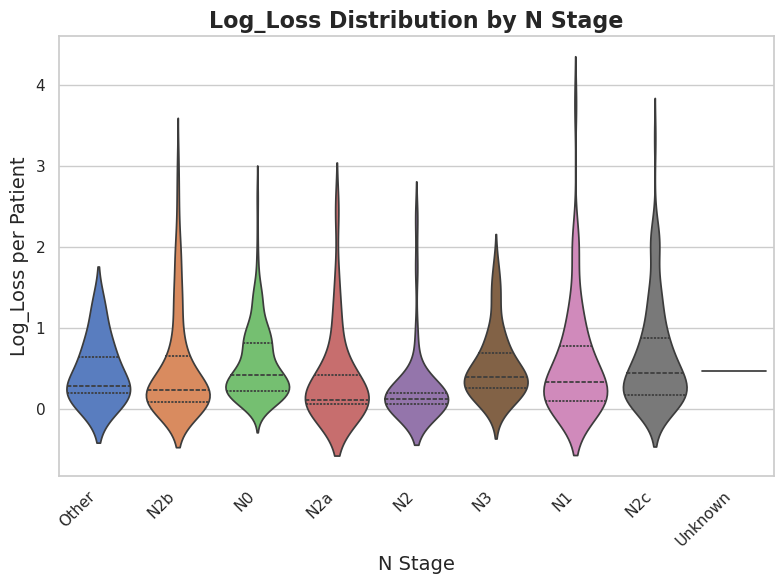


=== Subgroup Analysis for 'N Stage' using FairLearn ===

    ╒══════════════════════════════╤═════════════════════╤═════════════════════╤══════════════════════╤═════════════════════╕
    │                              │ N0                  │ N1                  │ N2                   │ N2a                 │
    ╞══════════════════════════════╪═════════════════════╪═════════════════════╪══════════════════════╪═════════════════════╡
    │ mean_prediction              │ 0.20717131474103587 │ 0.26865671641791045 │ 0.08108108108108109  │ 0.14285714285714285 │
    ├──────────────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼─────────────────────┤
    │ false_positive_rate          │ 0.1657142857142857  │ 0.1590909090909091  │ 0.030303030303030304 │ 0.09090909090909091 │
    ├──────────────────────────────┼─────────────────────┼─────────────────────┼──────────────────────┼─────────────────────┤
    │ Relative mean_prediction     │ 1.000 ✅            │ 1.

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:37<00:00,  3.37s/it]


In [6]:
from jarvais.explainer import Explainer

sensitive_features = {k: trainer.X_test[k] for k in ['N Stage', 'Disease Site', 'Sex']}

exp = Explainer.from_trainer(trainer, sensitive_features=sensitive_features)
exp.run()